In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import tensorflow as  tf
import numpy as np
import cv2
import os
from keras.utils import np_utils
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.layers import Conv2D, MaxPooling2D

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [ ]:
train_dataset=train.flow_from_directory('/content/drive/MyDrive/hinh/train',
                                      target_size = (150,150),
                                       batch_size = 12, 
                                       class_mode = 'categorical') 

validation_dataset=validation.flow_from_directory('/content/drive/MyDrive/hinh/test',
                                      target_size = (150,150),
                                       batch_size = 12,  
                                       class_mode = 'categorical')

 

Found 62 images belonging to 2 classes.
Found 62 images belonging to 2 classes.


In [ ]:
train_dataset.class_indices

{'Mask': 0, 'NoMask': 1}

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',padding='same',input_shape =(150,150,3)),
                                    tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',padding='same'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',padding='same'),
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',padding='same'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding='same'),
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding='same'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu',padding='same'),
                                    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu',padding='same'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(256,activation = 'relu'),
                                    ##
                                    tf.keras.layers.Dense(2,activation='softmax')
                                    ])

In [ ]:
from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(train_dataset,batch_size=12,epochs=50,verbose=1,validation_data=validation_dataset)

Epoch 1/50
6/6 [==============================] - 60s 10s/step - loss: 0.6911 - accuracy: 0.7581 - val_loss: 0.6890 - val_accuracy: 0.6290
Epoch 2/50
6/6 [==============================] - 1s 111ms/step - loss: 0.6851 - accuracy: 0.6290 - val_loss: 0.6816 - val_accuracy: 0.6290
Epoch 3/50
6/6 [==============================] - 1s 99ms/step - loss: 0.6778 - accuracy: 0.6290 - val_loss: 0.6736 - val_accuracy: 0.6290
Epoch 4/50
6/6 [==============================] - 1s 102ms/step - loss: 0.6697 - accuracy: 0.6290 - val_loss: 0.6647 - val_accuracy: 0.6290
Epoch 5/50
6/6 [==============================] - 1s 107ms/step - loss: 0.6608 - accuracy: 0.6290 - val_loss: 0.6556 - val_accuracy: 0.6290
Epoch 6/50
6/6 [==============================] - 1s 104ms/step - loss: 0.6529 - accuracy: 0.6290 - val_loss: 0.6473 - val_accuracy: 0.6290
Epoch 7/50
6/6 [==============================] - 1s 98ms/step - loss: 0.6477 - accuracy: 0.6290 - val_loss: 0.6399 - val_accuracy: 0.6290
Epoch 8/50
6/6 [=======

In [ ]:
model.save('CNN_face.h5')
model=load_model('CNN_face.h5')
score=model.evaluate(validation_dataset,verbose=1)
print("test loss = ",score[0])
print("test accuracy = ",score[1])

6/6 [==============================] - 0s 39ms/step - loss: 3.4596e-04 - accuracy: 1.0000
test loss =  0.00034595929901115596
test accuracy =  1.0


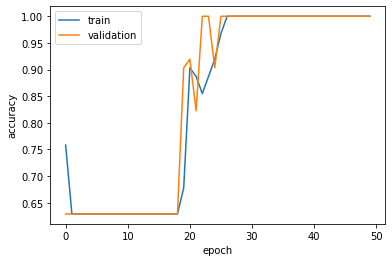

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

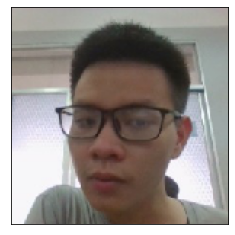

KhongKhauTrang


In [ ]:
img = load_img("/content/drive/MyDrive/hinh/test/NoMask/5.jpg", target_size=(150,150))
plt.xticks([])
plt.yticks([])
plt.imshow(img)
plt.show()
x= img_to_array(img)
x=np.expand_dims(x,axis=0)
images = np.vstack([x])
val=np.argmax(model.predict(images))
if val == 0:
    print("CoKhauTrang")
if val == 1:
    print("KhongKhauTrang")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('CNN_face.ipynb')